In [3]:
# Libraries

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from dask import bag
from dask import diagnostics
import cv2
import math
import random

## Data

In [2]:
number_classes = {
'Lote 1': len(os.listdir("Sin jaguar de noche/lote 1")),
'Lote 2': len(os.listdir("Sin jaguar de noche/lote 2")),
'Lote 3': len(os.listdir("Sin jaguar de noche/lote 3 - camara")),
'Lote 4': len(os.listdir("Sin jaguar de noche/lote 4 - camara"))
}

## Basic Exploration

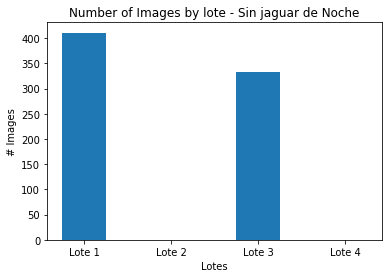

In [3]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by lote - Sin jaguar de Noche");
plt.xlabel('Lotes');
plt.ylabel('# Images');

In [4]:
directories = {
'Lote 1': 'Sin jaguar de noche/lote 1/',
'Lote 3': 'Sin jaguar de noche/lote 3 - camara/'
}

In [5]:
def get_dims(img):
    Y,X = img.shape[0], img.shape[1]
    return Y,X

In [6]:
h_list = []
w_list = []

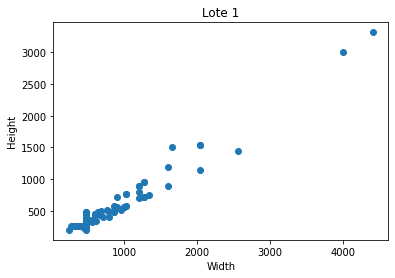

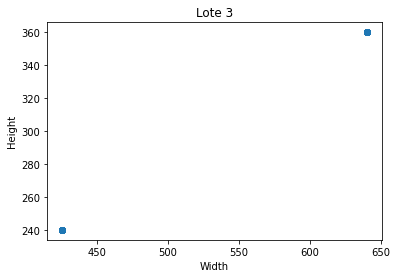

In [7]:
for key,value in directories.items():
    filepath = value
    filelist = [filepath + f for f in os.listdir(filepath)]


    for pathImage in filelist:
        img = cv2.imread(pathImage)
        if type(img) != type(None):
            y,x = get_dims(img)
            h_list.append(y)
            w_list.append(x)

    plt.scatter(w_list, h_list)

    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(key)
    plt.show()
    h_list = []
    w_list = []

## Comparing Images' Ratio

In [8]:
import math

In [9]:
aspect_ratios  = []

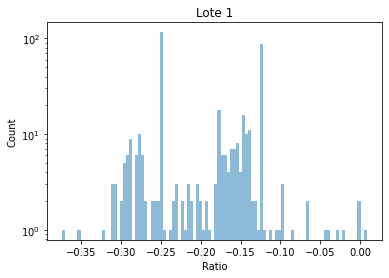

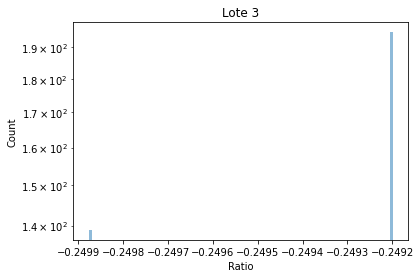

In [10]:
for key,value in directories.items():

  filepath = value
  filelist = [filepath + f for f in os.listdir(filepath)]

  for pathImage in filelist:
    img = cv2.imread(pathImage)
    if type(img) != type(None):
      aspect_ratios.append(math.log10(img.shape[0] / img.shape[1]))

  aspect_ratios = np.asarray(aspect_ratios)

  plt.hist(aspect_ratios, bins=100,log=True,alpha=0.5)
  plt.xlabel('Ratio')
  plt.ylabel('Count')
  plt.title(key)
  plt.show()

  aspect_ratios  = []

# Basic exploration

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob, os

In [12]:
from subprocess import check_output
smjpegs = [f for f in glob.glob("Sin jaguar de noche/lote 1/*.JPG")]
print(smjpegs[:9])

['Sin jaguar de noche/lote 1\\0.jpg', 'Sin jaguar de noche/lote 1\\10.jpg', 'Sin jaguar de noche/lote 1\\100.jpg', 'Sin jaguar de noche/lote 1\\101.jpg', 'Sin jaguar de noche/lote 1\\102.jpg', 'Sin jaguar de noche/lote 1\\103.jpg', 'Sin jaguar de noche/lote 1\\104.jpg', 'Sin jaguar de noche/lote 1\\105.jpg', 'Sin jaguar de noche/lote 1\\106.jpg']


In [13]:
first = cv2.imread('Sin jaguar de noche/lote 1/105.JPG')
dims = np.shape(first)
print(dims)

(480, 640, 3)


In [14]:
np.min(first), np.max(first)
pixel_matrix = np.reshape(first, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

(307200, 3)


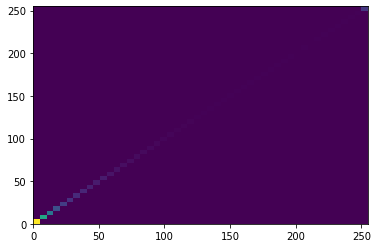

In [15]:
#plt.scatter(pixel_matrix[:,0], pixel_matrix[:,1])
_ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))

In [16]:

fifth = cv2.imread('Sin jaguar de noche/lote 1/108.JPG')
dims = np.shape(fifth)
pixel_matrix5 = np.reshape(fifth, (dims[0] * dims[1], dims[2]))

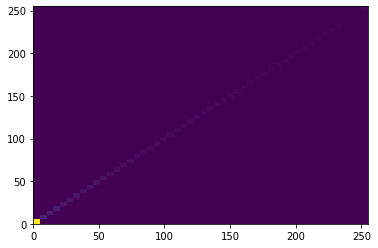

In [17]:
_ = plt.hist2d(pixel_matrix5[:,1], pixel_matrix5[:,2], bins=(50,50))

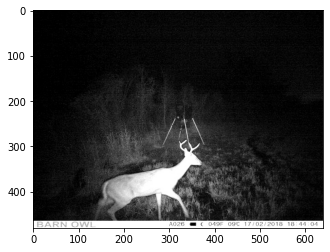

In [18]:
plt.imshow(first)

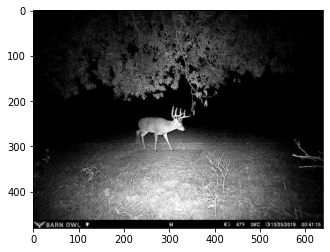

In [19]:
plt.imshow(fifth)

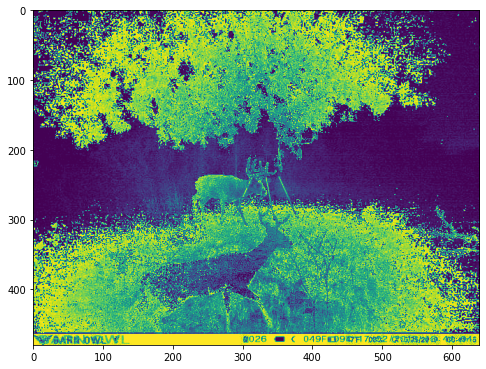

In [72]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(first[:,:,2] - fifth[:,:,1])

## Initial impressions


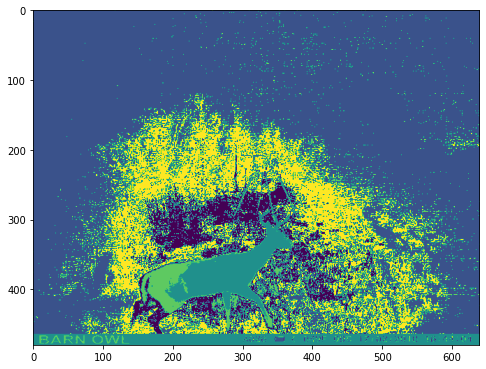

In [73]:
# simple k means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(5)
clustered = kmeans.fit_predict(pixel_matrix)

dims = np.shape(first)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
fig = plt.figure(figsize=(8, 8))
plt.imshow(clustered_img)

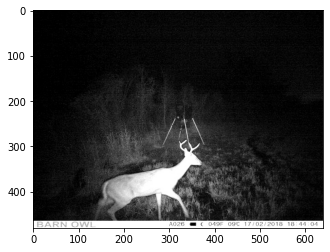

In [25]:
plt.imshow(first)

In [26]:
ind0, ind1, ind2, ind3 = [np.where(clustered == x)[0] for x in [0, 1, 2, 3]]

Text(0.5, 0, 'Red channel')

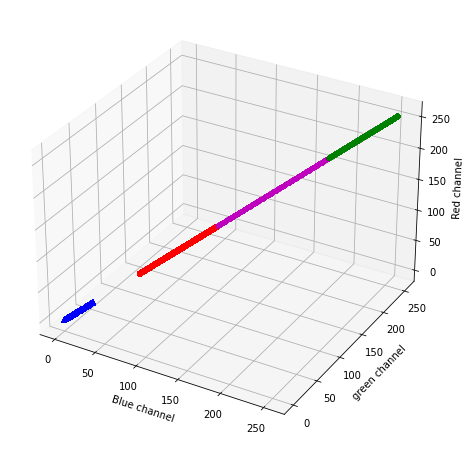

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
             ('b', '^', ind1),
             ('g', '8', ind2),
             ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix[ind, 0]
    ys = pixel_matrix[ind, 1]
    zs = pixel_matrix[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:ylabel='Density'>

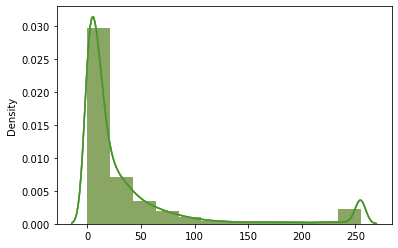

In [28]:
# quick look at color value histograms for pixel matrix from first image
import seaborn as sns
sns.distplot(pixel_matrix[:,0], bins=12)
sns.distplot(pixel_matrix[:,1], bins=12)
sns.distplot(pixel_matrix[:,2], bins=12)

In [29]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [37]:

firstMSI = MSImage(first)
print(np.shape(firstMSI.matrix))
print(np.shape(firstMSI.img))

(307200, 3)
(480, 640, 3)


In [38]:
def bnormalize(mat):
    """much faster brightness normalization, since it's all vectorized"""
    bnorm = np.zeros_like(mat, dtype=np.float32)
    maxes = np.max(mat, axis=1)
    bnorm = mat / np.vstack((maxes, maxes, maxes)).T
    return bnorm

### Img 1

C:\Users\EFRACK\AppData\Local\Temp\ipykernel_13208\985518055.py:5: RuntimeWarning: invalid value encountered in true_divide
  bnorm = mat / np.vstack((maxes, maxes, maxes)).T


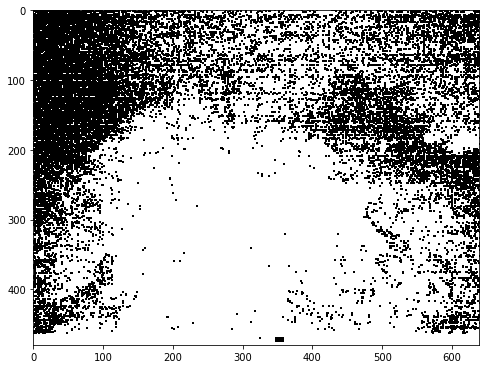

In [39]:
bnorm = bnormalize(firstMSI.matrix)
bnorm_img = firstMSI.to_matched_img(bnorm)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()

### Img 2

C:\Users\EFRACK\AppData\Local\Temp\ipykernel_13208\985518055.py:5: RuntimeWarning: invalid value encountered in true_divide
  bnorm = mat / np.vstack((maxes, maxes, maxes)).T


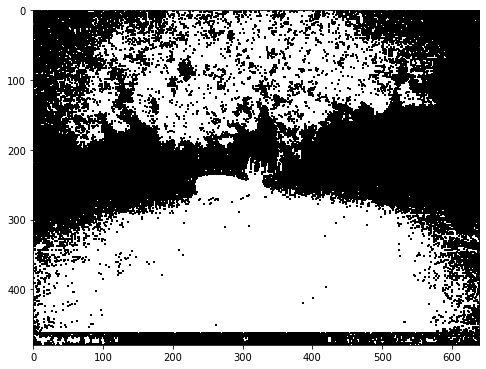

In [42]:
fifthMSI = MSImage(fifth)
bnorm_img_2 = bnormalize(fifthMSI.matrix)
bnorm_img_2_ = fifthMSI.to_matched_img(bnorm_img_2)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img_2_)
plt.show()

## Sobel Edge Detection


In [49]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel

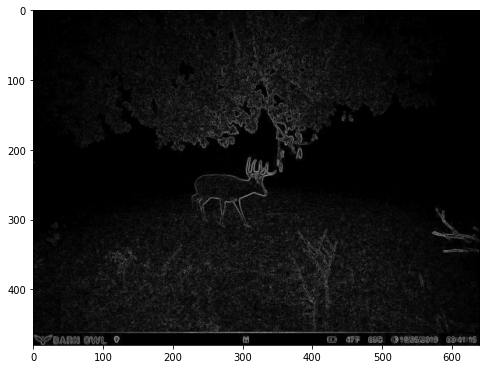

In [52]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(fifth))

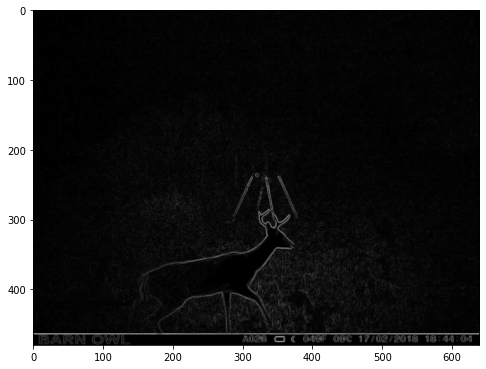

In [53]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(first))

In [62]:
from skimage import color

hsv1 = color.rgb2hsv(first)
hsv2 = color.rgb2hsv(fifth)

C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distribution

<AxesSubplot:ylabel='Density'>

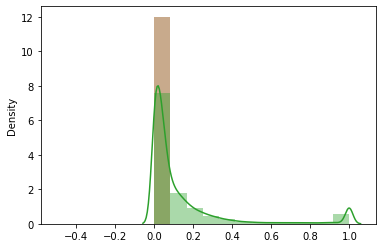

In [65]:
hsvmsi1 = MSImage(hsv1)
sns.distplot(hsvmsi1.matrix[:,0], bins=12)
sns.distplot(hsvmsi1.matrix[:,1], bins=12)
sns.distplot(hsvmsi1.matrix[:,2], bins=12)

C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EFRACK\anaconda3\lib\site-packages\seaborn\distribution

<AxesSubplot:ylabel='Density'>

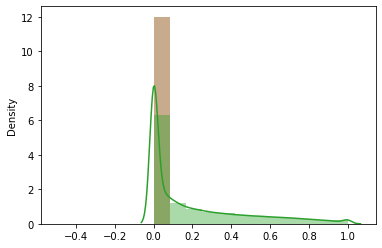

In [64]:
hsvmsi2 = MSImage(hsv2)
sns.distplot(hsvmsi2.matrix[:,0], bins=12)
sns.distplot(hsvmsi2.matrix[:,1], bins=12)
sns.distplot(hsvmsi2.matrix[:,2], bins=12)

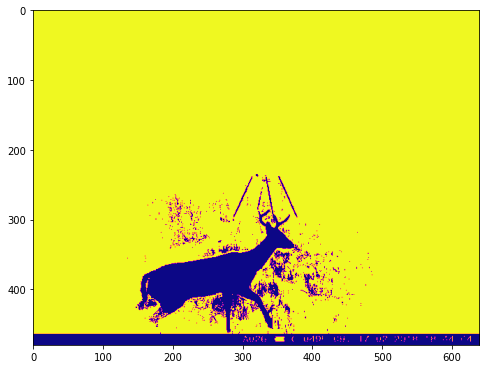

In [70]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(hsvmsi1.image[:,:,2] < 0.4, cmap="plasma")

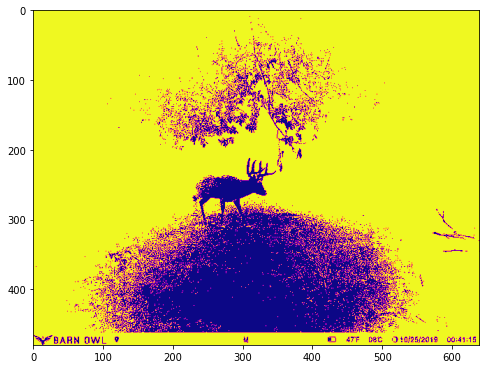

In [71]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(hsvmsi2.image[:,:,2] < 0.4, cmap="plasma")